# Brownian dynamics simulator

In [3]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib notebook
from scipy import *
from tqdm.notebook import *

# Rk4 integrator and functions definitions

In [4]:
#########################
#numerical integrator####


def integrate_euler(F,t,y,tstop,dt):

    def euler(F,t,y,dt):
        #retorna o incremento apra utilizar na resolucao
        K0=dt*F(t,y)
        return K0

    T=[]
    Y=[]
    T.append(t)
    Y.append(y)
    
    pbar = tqdm(total=(tstop-dt))
    while t<tstop:
        pbar.update(dt)
        dt=min(dt,tstop-t)
        y=y+euler(F,t,y,dt)
        t=t+dt
        T.append(t)
        Y.append(y)

    return np.array(T),np.array(Y) 


##################################
#functions for simulating the dynamics

def harmonic_trap_potential(x,y,z,k,theta):
    kx=k[0]
    ky=k[1]
    kz=k[2]
    return 1/2 *((kx*(x*np.cos(theta)-y*np.sin(theta))**2)+
                     (ky*(x*np.sin(theta)+y*np.cos(theta))**2) + 1/2*kz*z**2)

def harmonic_trap(x,y,z,k,theta):

    
    kx=k[0]
    ky=k[1]
    kz=k[2]
    
    Fx = - (kx*(x*np.cos(theta)-y*np.sin(theta))*np.cos(theta)+(ky*(x*np.sin(theta)+y*np.cos(theta))*np.sin(theta)))
    Fy = - (-kx*(x*np.cos(theta)-y*np.sin(theta))*np.sin(theta)+(ky*(x*np.sin(theta)+y*np.cos(theta))*np.cos(theta)))
    Fz = - kz*z
    return Fx,Fy,Fz


def brownian_simulation_inertial(t_stop, dt, k, W, gamma, theta = 0, m=1,delta_x=0,delta_v=0):
    print('k',k)
    print('theta',theta)
    print('W',W)
    def F(t,y):

        Fi=np.zeros(6) #[x,vx,y,vy,z,vz]
        Fx,Fy,Fz = harmonic_trap(y[0],y[2],y[4],k,theta)
        
        W1 = W/np.sqrt(dt)
        
        Fi[0]= (1/gamma) * Fx + W1/gamma*(np.random.normal(scale=1))
        Fi[1]= 0
        
        Fi[2]= (1/gamma) * Fy + W1/gamma*(np.random.normal(scale=1)) 
        Fi[3]= 0
        
        Fi[4]= (1/gamma) * Fz + W1/gamma*(np.random.normal(scale=1))
        Fi[5]= 0
            
        return Fi

    
    def initial_condition():
        y=np.zeros(6)

        for i in range(0,6,2):

            y[i] = delta_x*(1-2*np.random.rand())
            y[i+1] = delta_v*(1-2*np.random.rand())

        #define initial position
        #y[0]= 10
        
        return y
    
    r0=initial_condition()
    T,Y=integrate_euler(F,0,r0,t_stop,dt)
    return T,Y


# Simulation of the Brownian Motion

In [13]:
#[kx,ky,kz] - parameters of the harmonic trap
k_0 = [.2,.1,.5]

#noise parameters
#drag parameter
m=1
gamma_0 = .2
kB = 1
T0 = 1
D = kB * T0 / gamma_0
W_0 = np.sqrt(2*kB*T0*gamma_0)


#xy angle
theta = 0


#simulation time, dt step
t_stop = 10000
dt = 0.1

#simulation Y is a vector with [x,vx,y,vy,z,vz](t)
initial_pos = []
T,Y = brownian_simulation_inertial(t_stop,dt, k_0, W_0, gamma = gamma_0, m = m , theta = theta, delta_x=2)

time = T
x_data = Y[:,0]
y_data = Y[:,2] 
z_data = Y[:,4]

k [0.2, 0.1, 0.5]
theta 0
W 0.6324555320336759


  0%|          | 0/9999.9 [00:00<?, ?it/s]

In [7]:
k_0

[0.2, 0.1, 0.5]

# Parameters of the trap

<IPython.core.display.Javascript object>


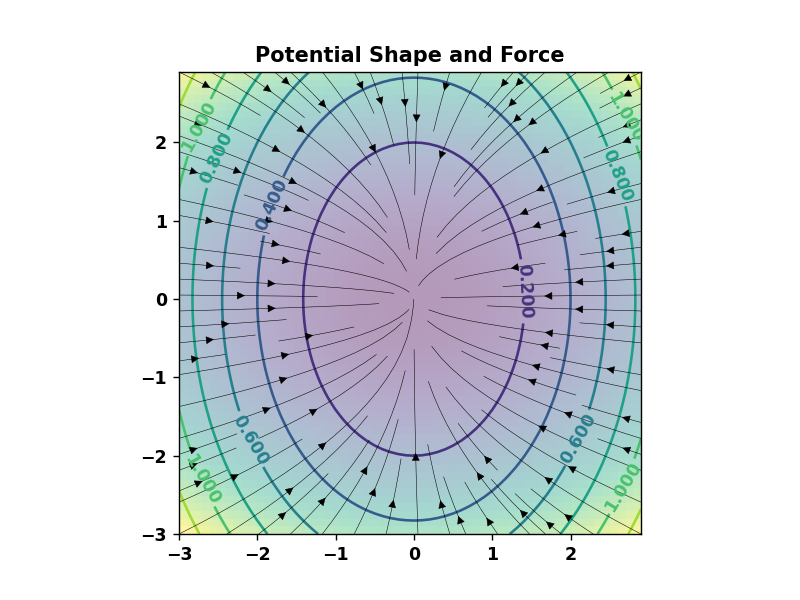

C:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: scipy.transpose is deprecated and will be removed in SciPy 2.0.0, use numpy.transpose instead
  if __name__ == '__main__':


Text(0.5, 1.0, 'Potential Shape and Force')

In [14]:
x = np.arange(-3,3,0.1) 
y = np.arange(-3,3,0.1)
xx,yy = np.meshgrid(x,y)

Fx,Fy,Vz = harmonic_trap(xx,yy,0,k_0,theta)
V = harmonic_trap_potential(xx,yy,0,k_0,theta)

subplots()
imshow(transpose(V),extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin='lower',alpha=0.4)
CS = contour(V,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
clabel(CS, CS.levels, inline=True, fontsize=10)
streamplot(xx,yy,Fx,Fy, density=[1, 1],color='k', linewidth=0.3)
title('Potential Shape and Force')

# Plot the Signals Obtained

<IPython.core.display.Javascript object>


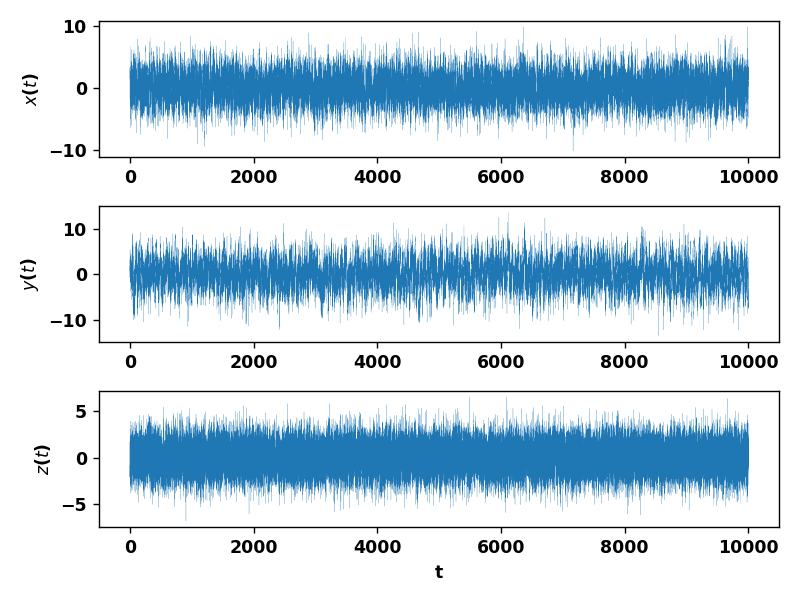

In [21]:
subplots()
title('Signals')
subplot(311)
plot(time, x_data,lw=0.1)
ylabel(r'$x(t)$')
subplot(312)
plot(time, y_data,lw=0.1)
ylabel(r'$y(t)$')
subplot(313)
plot(time, z_data,lw=0.1)
ylabel(r'$z(t)$')
xlabel('t')
tight_layout()

# Plot a 2d histogram (xy) for the position probability

<IPython.core.display.Javascript object>


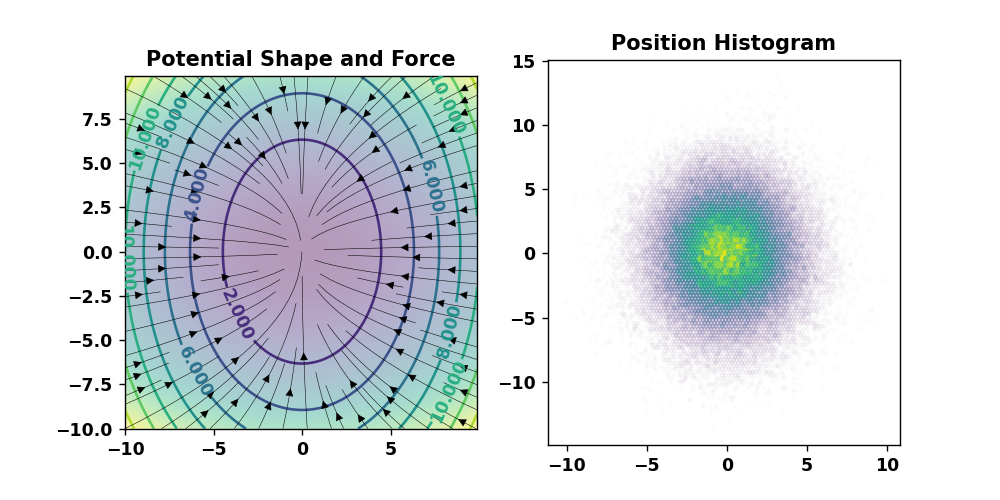

Text(0.5, 1.0, 'Position Histogram')

In [47]:
from matplotlib.colors import ListedColormap
subplots(figsize=[8,4])

subplot(121)
x = np.arange(-10,10,0.1) 
y = np.arange(-10,10,0.1)
xx,yy = np.meshgrid(x,y)

Fx,Fy,Vz = harmonic_trap(xx,yy,0,k_0,theta)
V = harmonic_trap_potential(xx,yy,0,k_0,theta)


imshow(np.transpose(V),extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin='lower',alpha=0.4)
CS = contour(V,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
clabel(CS, CS.levels, inline=True, fontsize=10)
streamplot(xx,yy,Fx,Fy, density=[1, 1],color='k', linewidth=0.3)
title('Potential Shape and Force')

subplot(122)
cmap = cm.viridis_r
new_cmap = cm.viridis(np.arange(cmap.N))
new_cmap[:,-1] = np.linspace(0.0,1,cmap.N)
new_cmap = ListedColormap(new_cmap)
hexbin(x_data,y_data,bins=100,cmap = new_cmap)
title('Position Histogram')

# Stiffness computation using standard deviation

In [16]:
#data retrieved from simulation
plot_step = 5 #a stride to reduce size of data
x_d = Y[:,0][::plot_step]
y_d = Y[:,2][::plot_step]
z_d = Y[:,4][::plot_step]

k_x = (kB*T0)/np.var(x_d)
k_y = (kB*T0)/np.var(y_d)
k_z = (kB*T0)/np.var(z_d)
print(k_x, k_y, k_z)
print(k_0)
print('APE',np.abs(k_x-k_0[0])/k_0[0]*100,
      np.abs(k_y-k_0[1])/k_0[1]*100,np.abs(k_z-k_0[2])/k_0[2]*100)

0.18451396287024302 0.09706106106733414 0.4345608173119664
[0.2, 0.1, 0.5]
APE 7.743018564878495 2.938938932665863 13.087836537606723


# Stiffness computation using Power Spectral Density

<IPython.core.display.Javascript object>


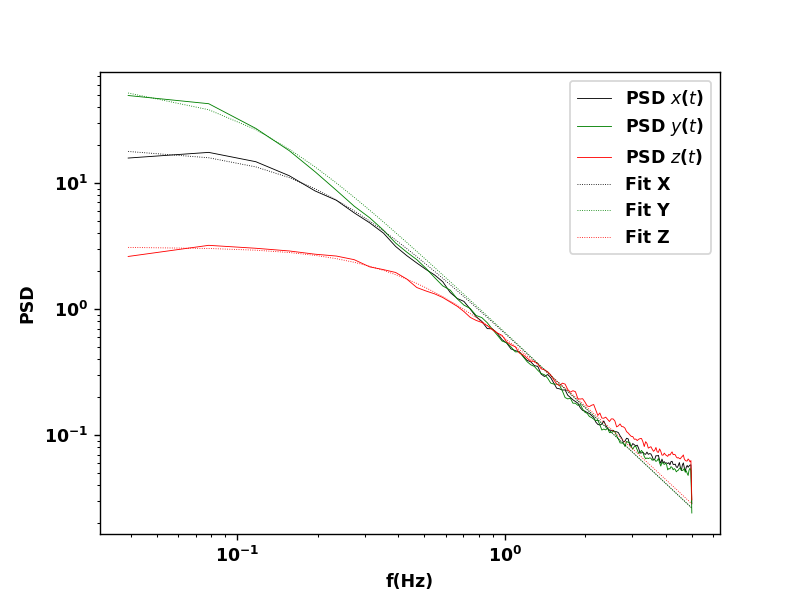

k_psd -0.09077379637144457 -0.051188531115007894 -0.2127665301381858
k_0 0.2 0.1 0.5


In [66]:
from scipy import signal
from scipy.optimize import curve_fit

subplots()
fs = 1./((T[1]-T[0]))
f,psd_x = signal.welch(x_data, fs)
f,psd_y =  signal.welch(y_data, fs)
f,psd_z = signal.welch(z_data, fs)
f = f[1:]
psd_x = psd_x[1:]
psd_y = psd_y[1:]
psd_z = psd_z[1:]
plot(f,psd_x,lw=0.5,label=r'PSD $x(t)$',color='k')
plot(f,psd_y,lw=0.5,label=r'PSD $y(t)$',color='g')
plot(f,psd_z,lw=0.5,label=r'PSD $z(t)$',color='r')
xscale('log')
yscale('log')
xlabel('f(Hz)')
ylabel('PSD')

    
def Lorentzian(f, D, f0):
    return D /((2*np.pi**2)*(f**2+f0**2))


x_params, pcov = curve_fit(Lorentzian, f, psd_x)

plot(f, Lorentzian(f,x_params[0],x_params[1]),
     lw=0.5,ls=':',color='k',label='Fit X')

kx = 2*np.pi*x_params[1]*kB*T0/x_params[0]

y_params, pcov = curve_fit(Lorentzian, f, psd_y)
plot(f, Lorentzian(f,y_params[0],y_params[1]),
     lw=0.5,ls=':',color='g',label='Fit Y')

ky = 2*np.pi*y_params[1]*kB*T0/y_params[0]

z_params, pcov = curve_fit(Lorentzian, f, psd_z)
plot(f, Lorentzian(f,z_params[0],z_params[1]),
     lw=0.5,ls=':',color='r',label='Fit Z')


kz = 2*np.pi*z_params[1]*kB*T0/z_params[0]

print('k_psd',kx,ky,kz)
print('k_0',k_0[0],k_0[1],k_0[2])



legend()

# Stiffness computation using Boltzmann Statistics

<IPython.core.display.Javascript object>


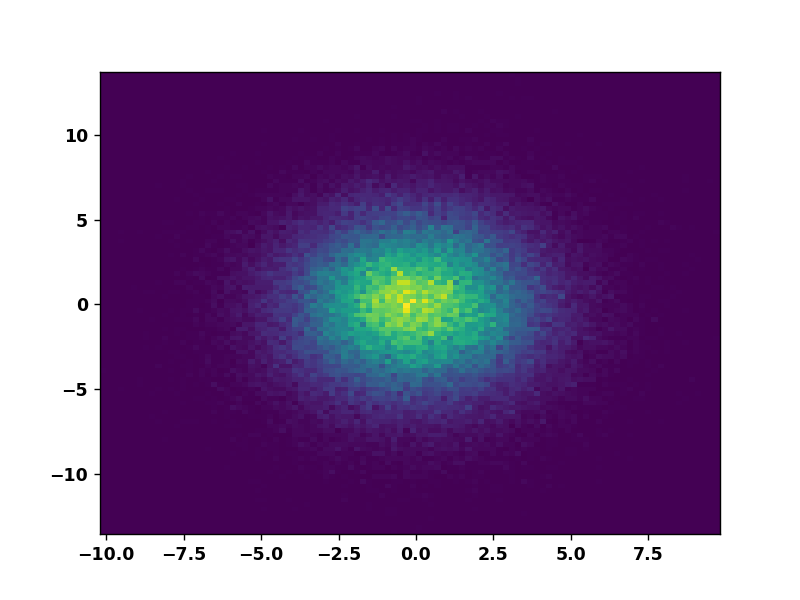

<IPython.core.display.Javascript object>


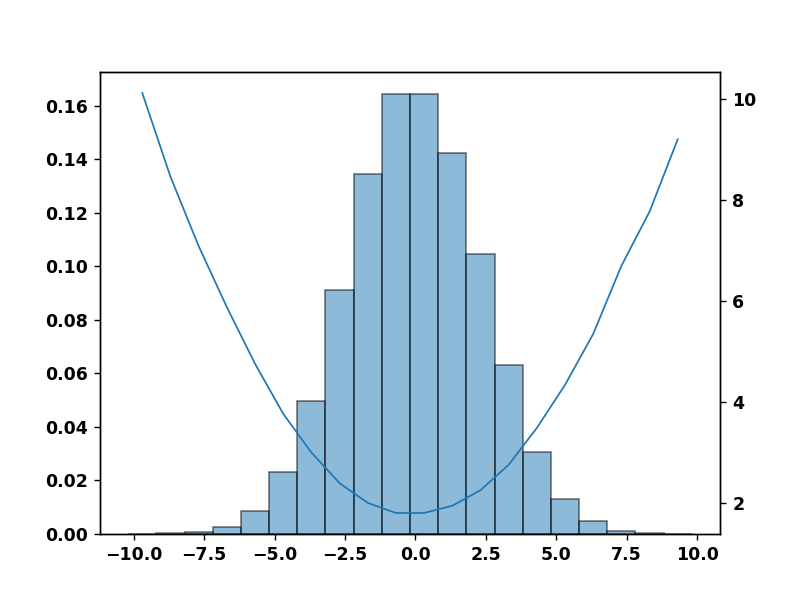

kx 0.2366159736985567


In [19]:
subplots()
h,xedges,yedges,s = hist2d(x_data,y_data,bins=100)
dados = np.column_stack([x_data,y_data])

subplots()

h,edges, s= hist(x_data, bins=20,ec='k',alpha=0.5,density=True)
prob_x = h 
U_x = -kB*T0*np.log(prob_x)
U_x = U_x
xx = np.array((edges+np.roll(edges,-1))/2)[:-1]
ax = gca()
ax1 = twinx(ax)
ax1.plot(xx,U_x,lw=1)

def pot_1d(x,k,x0):
    return 0.5*k*(x-x0)**2

params, pcov = curve_fit(pot_1d,xx,U_x)
print('kx',params[0])


# Compare the results